In [1]:
import time
from glob import glob
from tqdm import tqdm
import pandas as pd
from utils import get_hour_crawl_df_lst, get_daily_origin_df_dict
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import numpy as np
from IPython.display import clear_output
sns.set_palette("Set1", 7)
sns.color_palette("Set1", 7)

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392)]

In [28]:
sda_path = '/mnt/sda/tnecniv/tnecniv-2023/'
selected_weeks = sorted(glob(sda_path+'*-*'))[5:6]
origin = [pd.read_csv(s+'/origin.csv', names=['user_login', 'origin'], usecols=[0, 1]) for s in selected_weeks]
ten_min_csvs = [w for week in selected_weeks for w in sorted(glob(week+'/*-*.csv'))]
first_day = ten_min_csvs[0].split('/')[-1][:6]
last_day = ten_min_csvs[-1].split('/')[-1][:6]
first_day, last_day

('230813', '230819')

In [21]:
origin_names = ['ams04', 'muc03', 'cmh01', 'iad06', 'pdx05', 'usw23', 'sin03', '']
language_names = ['en', 'es', 'pt', 'ru', 'fr', 'de', 'ja', 'ko', 'zh', 'it', 'tr', 'pl', 'th', 'ar', 'cs', 'other', 'hu', 'nl', 'uk', 'sv', 'fi', 'el', 'da', 'bg', 'tl', 'no', 'ro', 'sk', 'id', 'zh-hk', 'ca', 'vi', 'hi', 'asl', 'ms', '']
sc_result_dict = {(o, l): [] for o in origin_names for l in language_names}
vc_result_dict = {(o, l): [] for o in origin_names for l in language_names}
ori_lang_pair = [(o, l) for o in origin_names for l in language_names]

In [22]:
for csv in tqdm(ten_min_csvs):
    df_lst = get_hour_crawl_df_lst(csv, origin[0])
    for df in df_lst:
        sc_res = df[['user_login', 'origin', 'language']].groupby(['origin', 'language']).count().to_dict()['user_login']
        vc_res = df[['viewer_count', 'origin', 'language']].groupby(['origin', 'language']).sum().to_dict()['viewer_count']
        for ol_pair in ori_lang_pair:
            try:
                sc_result_dict[ol_pair].append(sc_res[ol_pair])
            except:
                sc_result_dict[ol_pair].append(0)
            try:
                vc_result_dict[ol_pair].append(vc_res[ol_pair])
            except:
                vc_result_dict[ol_pair].append(0)
    

100%|██████████| 168/168 [05:33<00:00,  1.99s/it]


In [23]:
df

,id,user_id,user_login,game_id,game_name,viewer_count,started_at,language,is_mature,crawl_started_at,crawl_ended_at,origin
0,39867539333,147084100,gamers8gg,32399,Counter-Strike: Global Offensive,69764,23/08/19-21:19:41,en,False,23/08/19-23:50:00,23/08/19-23:53:17,muc03
1,41002903192,124422593,lec,21779,League of Legends,63674,23/08/19-21:47:44,en,False,23/08/19-23:50:00,23/08/19-23:53:17,ams04
2,41751718825,181077473,gaules,32399,Counter-Strike: Global Offensive,32785,23/08/19-20:57:57,pt,True,23/08/19-23:50:00,23/08/19-23:53:17,iad06
3,47155120236,22346597,lvpes,21779,League of Legends,31905,23/08/19-21:11:27,es,False,23/08/19-23:50:00,23/08/19-23:53:17,lhr05
4,39867481669,622498423,otplol_,21779,League of Legends,29211,23/08/19-21:02:35,fr,False,23/08/19-23:50:00,23/08/19-23:53:17,lhr05
...,...,...,...,...,...,...,...,...,...,...,...,...
102018,47155533308,57744205,yesterdays_dindins,13332,Pokémon FireRed/LeafGreen,0,23/08/19-23:53:02,en,False,23/08/19-23:50:00,23/08/19-23:53:17,
102019,42628191243,111181108,playerking75,491931,Escape from Tarkov,0,23/08/19-23:52:58,en,True,23/08/19-23:50:00,23/08/19-23:53:17,
102020,49125439325,679537698,landentanq,493959,Red Dead Redemption 2,0,23/08/19-23:51:09,en,False,23/08/19-23:50:00,23/08/19-23:53:17,
102021,40544878951,41394467,sadie2567,491487,Dead by Daylight,0,23/08/19-23:50:03,en,False,23/08/19-23:50:00,23/08/19-23:53:17,sin03


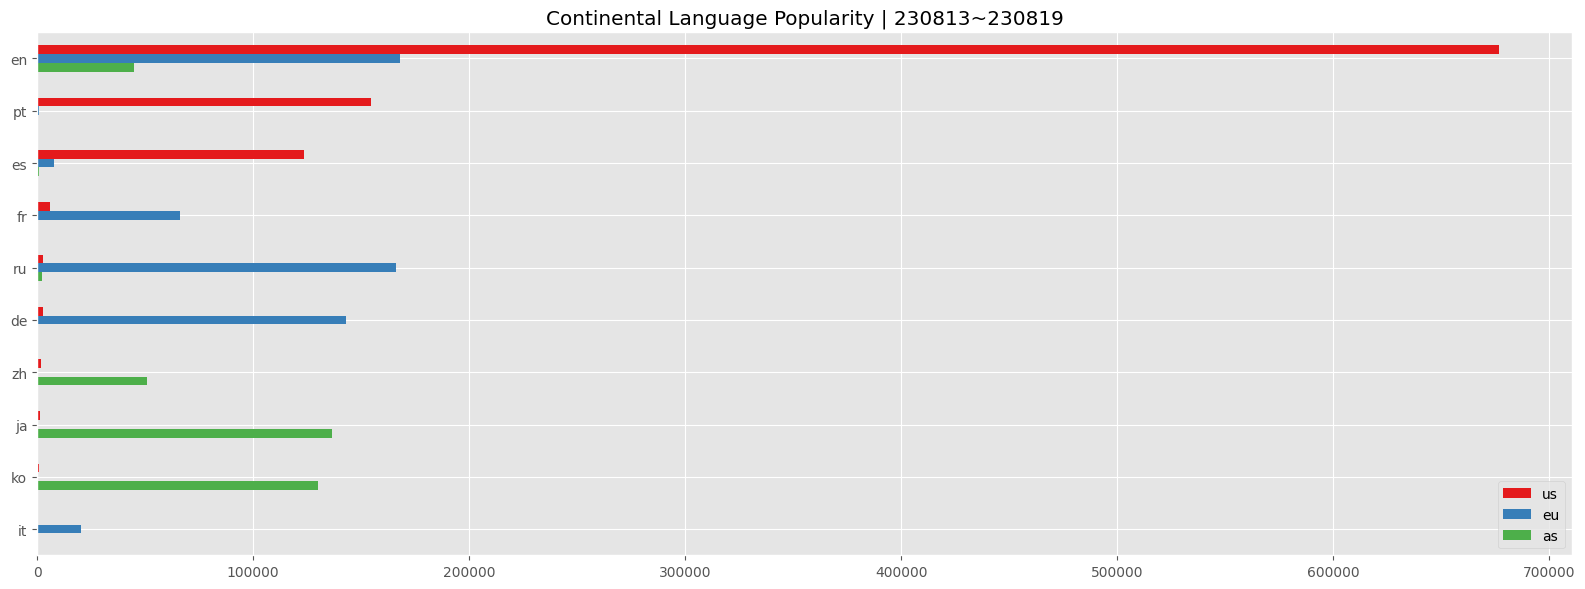

In [46]:
lang_popu = {o:{} for o in origin_names}
for ori in origin_names:
    for l in language_names:
        lang_popu[ori][l] = np.average(vc_result_dict[(ori, l)])
fig, ax = plt.subplots(1, figsize=(16, 6))
df = pd.DataFrame(lang_popu)
df['as'] = df['sin03']
df['eu'] = df['ams04'] + df['muc03'] 
df['us'] = df['cmh01'] + df['iad06'] + df['pdx05']
df = df[['us', 'eu', 'as']][df.index.isin(language_names[:10])].sort_values('us', ascending=False)
df.plot(kind='barh', ax=ax).invert_yaxis()
ax.set_title(f'Continental Language Popularity | {first_day}~{last_day}')
fig.tight_layout()

In [ ]:
df['us'].sort_values(ascending=False)[:5].plot(kind='barh', ax=ax[0]).invert_yaxis()
ax[0].set_title(f'{first_day}~{last_day} | Language Popularity Top 5 by Viewer Count - America')
df['eu'].sort_values(ascending=False)[:5].plot(kind='barh', ax=ax[1]).invert_yaxis()
ax[1].set_title(f'{first_day}~{last_day} | Language Popularity Top 5 by Viewer Count - Europe')
for a in ax:
    a.set_ylabel('language')

df['as'].sort_values(ascending=False)[:5].plot(kind='barh', ax=ax[2]).invert_yaxis()
ax[2].set_title(f'{first_day}~{last_day} | Language Popularity Top 5 by Viewer Count - Asia')
fig.tight_layout()